In [125]:
import os
import csv
import numpy as np

WEB_MAP = {
    'www_amazon_com': 0,
    'www_amazon_de': 1,
    'www_bbc_co_uk': 2,
    'www_walmart_com': 3,
    'www_youtube_com': 4
}

In [157]:
# two times
# 5 websites
# 8 teams

size = (8, 5, 14, 2)

website_dict = np.zeros(size)
ping_dict = np.zeros(size)
for c, team in enumerate(os.listdir("Project3CommunityData")):
    time_one = None
    for f in os.listdir(f'Project3CommunityData/{team}/clean_data/seq2'):
        if 'api_seq2.txt' in f:
            key = f[:-13]
            index = WEB_MAP[key]
            with open(f'Project3CommunityData/{team}/clean_data/seq2/{f}', 'r') as ping:
                pingreader = csv.reader(ping)
                date_index = 0
                date = None
                time_index = 0
                time = None
                for row in pingreader:
                    if date and date != row[2]:
                        date_index += 1
                        date = row[2]
                        time = None
                        time_index = 0
                    else:
                        date = row[2]
                        time_index = 0

                    if time and time != row[3]:
                        time_index += 1
                        time = row[3]
                    else:
                        time = row[3]
                    website_dict[c, index, date_index, time_index] = float(row[-1])
        if 'ping_seq2.txt' in f:
            key = f[:-14]
            index = WEB_MAP[key]
            with open(f'Project3CommunityData/{team}/clean_data/seq2/{f}', 'r') as ping:
                pingreader = csv.reader(ping)
                date_index = 0
                date = None
                time_index = 0
                time = None
                count = 1
                for row in pingreader:
                    if date and date != row[1]:
                        date_index += 1
                        date = row[1]
                        time = None
                        time_index = 0
                        count = 1
                    else:
                        date = row[1]
                        time_index = 0

                    if time and time != row[2]:
                        time_index += 1
                        time = row[2]
                        count = 1
                    else:
                        time = row[2]
                    try:
                        ping_dict[c, index, date_index, time_index] = (ping_dict[c, index, date_index, time_index] + float(row[-1])) / count
                        count += 1
                    except:
                        print(row[-1])

N/A


In [158]:
from scipy import stats

In [165]:
network_fraction = ping_dict / website_dict

y = np.ma.masked_where(~np.isfinite(network_fraction), network_fraction)

median_by_site = np.ma.median(y, axis=(0, 2, 3))

median_by_team = np.ma.median(y, axis=(1, 2, 3))

median_by_team_by_time = np.ma.median(y, axis=(1, 2))

median_by_team_by_date = np.ma.median(y, axis=(1, 3))

print(median_by_site)
print(median_by_team)
print(median_by_team_by_time)
print(stats.describe(median_by_team_by_date, axis=1))


[0.2817842138940809 0.2877263102461163 0.4566152459118977
 0.3317931359539046 0.29470869417038786]
[0.3763055317385665 0.2144950252146654 0.49429978594164603
 0.48728726641248055 0.19809780053389014 0.33866543434440033
 0.22866624644774886 0.2727816205533597]
[[0.3763055317385665 0.38258782566526595]
 [0.20999712098631623 0.22063254057305462]
 [0.5036387421337869 0.4817172545661158]
 [0.47214540451121123 0.4959910295710137]
 [0.19809780053389014 --]
 [0.3214444953944268 0.3612397010635811]
 [0.22699611419572532 0.23189820644541376]
 [0.27378083960219307 0.27012987012987016]]
DescribeResult(nobs=14, minmax=(array([0.29497225, 0.17075689, 0.45351856, 0.3384094 , 0.        ,
       0.        , 0.20536902, 0.1973792 ]), array([0.46302573, 0.28191629, 0.53766386, 0.97193423, 0.1980978 ,
       0.37012689, 0.24415365, 0.30976918])), mean=array([0.38058992, 0.21686158, 0.4964086 , 0.54321247, 0.01414984,
       0.17013567, 0.22620898, 0.26689901]), variance=array([0.0023671 , 0.00083094, 0.00

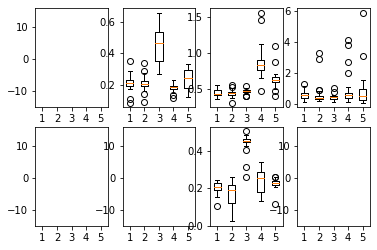

In [166]:
import matplotlib.pyplot as plt

fig1, (ax1, ax2) = plt.subplots(2, 4)

y_1 = y.reshape(8,5,28)
y_1 = np.transpose(y_1, (0,2,1))

for i in range(4):
    ax1[i].boxplot(y_1[i,:,:])
    ax2[i].boxplot(y_1[i+4,:,:])

<BarContainer object of 5 artists>

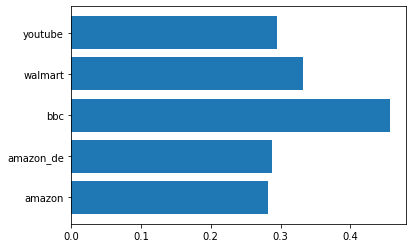

In [161]:
fig2, ax3 = plt.subplots()

ax3.barh(['amazon', 'amazon_de', 'bbc', 'walmart', 'youtube'], median_by_site)

<BarContainer object of 8 artists>

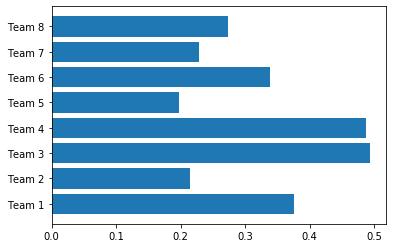

In [162]:
fig3, ax4 = plt.subplots()

ax4.barh(['Team 1', 'Team 2', 'Team 3', 'Team 4', 'Team 5', 'Team 6', 'Team 7', 'Team 8'], median_by_team)

<BarContainer object of 16 artists>

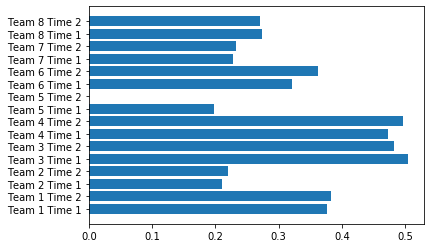

In [163]:
fig4, ax5 = plt.subplots()

labels = []

for i in range(16):
    labels.append(f'Team {i//2 + 1} Time {i%2 + 1}')

data = median_by_team_by_time.flatten()

ax5.barh(labels, data)

(8, 14)
(14,)


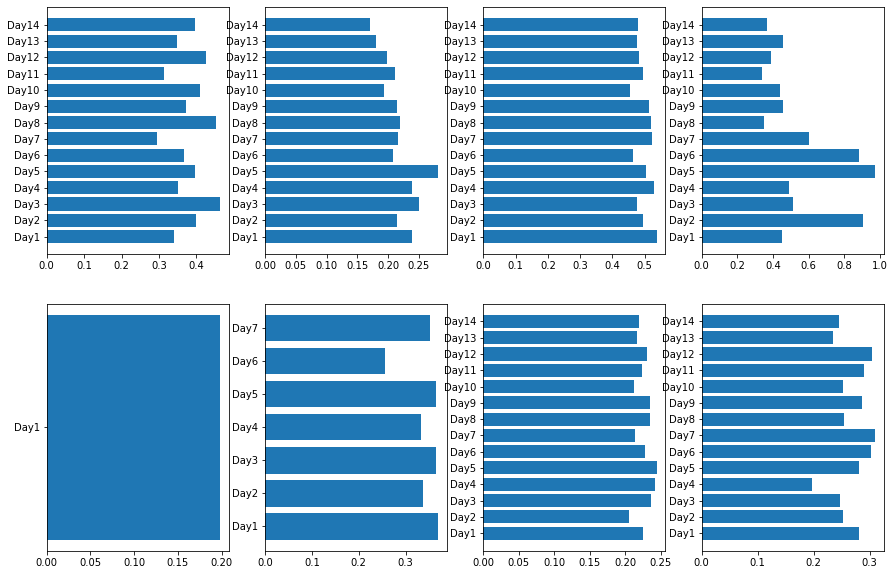

In [164]:
fig4, (ax5,ax6) = plt.subplots(2, 4, figsize=(15, 10))

labels = []

for i in range(14):
    labels.append(f'Day{i+1}')

print(median_by_team_by_date.shape)
print(median_by_team_by_date[3,:].shape)

for i in range(4):
    ax5[i].barh(labels, median_by_team_by_date[i,:])
    ax6[i].barh(labels, median_by_team_by_date[i+4,:])
